In [1]:
# Importation des modules

import pandas as pd
from gensim.models import Word2Vec
import random
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import datetime

#Affichage de toutes les colonnes

pd.set_option('display.max_columns', 500)

In [ ]:
#Si pyemd n'est pas installé
conda install -c conda-forge pyemd 

In [2]:
df = pd.read_csv("data\data_cleaned_NLP.csv", sep = ',', encoding = 'latin-1')

In [3]:
def toweekday(date):
    
    dic = {
            0 : "Lundi", 
            1 : "Mardi",
            2 : "Mercredi",
            3 : "Jeudi",
            4 : "Vendredi",
            5 : "Samedi",
            6 : "Dimanche"
            }
    
    date1 = datetime.datetime.strptime(date, '%Y-%m-%d')
    num = date1.weekday()
    
    return(dic[num])

df['Jour'] = df["Date"].apply(toweekday)

In [4]:
w2v_model_all = Word2Vec.load('results\word2vec_all_300.model')

In [5]:
w2v_model_all.init_sims(replace = True)

In [6]:
dfc = df.copy()

In [7]:
dfc['Date'][0]

'2019-11-04'

In [8]:
def datecroiss(s):
    #transforme un str de date en un int qu'on peut ranger par ordre croissant : 03/02/2019-->20190203 (AAAAMMJJ)
    
    AAAA = s[0:4]
    MM = s[5:7]
    JJ = s[8:10]
    return int(AAAA+MM+JJ)

def annee(s):
    return int(s[0:4])

In [9]:
dfc['Datec'] = dfc['Date'].apply(datecroiss)
dfc['Annee'] = dfc['Date'].apply(annee)

In [10]:
dfc.head()

,Unnamed: 0,Unnamed: 0.1,Orateur,Date,Nature.de.séance,Président.de.séance,Sujet.débattu,Réplique,Didascalie,Président.de.séance_propre,nom.famille,sexe,age,groupe.sigle,commissions,nb.mandats,cabcollab,duree.pol,clustRFSP,clustVEP,hautdip,naissance_an,majo,profsigni2,ID,Groupe,time_floor,tokenized_replique,tokenized_didascalie,stemmed_replique,stemmed_didascalie,Jour,Datec,Annee
0,0,1,adrien morenas,2019-11-04,Projet de loi de finances pour 2020,Présidence de M. Hugues Renson,NaN,Si vous y donnez un avis favorable madame la ...,NaN,Présidence de M. Hugues Renson,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,1,Exp,2019-11-01,si donnez avis favorable madame secrétaire éta...,NaN,si don avis favor madam secrétair état dissip ...,NaN,Lundi,20191104,2019
1,1,2,adrien morenas,2019-11-04,Projet de loi de finances pour 2020,Présidence de M. Hugues Renson,NaN,Plus généralement je soutiendrai un autre ame...,NaN,Présidence de M. Hugues Renson,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,2,Exp,2019-11-01,plus généralement soutiendrai autre amendement...,NaN,plus général soutiendr autr amend vis demand g...,NaN,Lundi,20191104,2019
2,2,3,adrien morenas,2019-07-02,Questions au Gouvernement,Présidence de M. Richard Ferrand,Convention citoyenne sur le climat,Ma question sadresse à M. François de Rugy ...,NaN,Présidence de M. Richard Ferrand,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,3,Exp,2019-07-01,question adresse françois rugy ministre état m...,NaN,question adress françois rugy ministr état min...,NaN,Mardi,20190702,2019
3,3,4,adrien morenas,2018-02-01,Accès à leau,Présidence de Mme Carole Bureau-Bonnard,Discussion générale,Le 1,NaN,Présidence de Mme Carole Bureau-Bonnard,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,4,Exp,2018-02-01,NaN,NaN,NaN,NaN,Jeudi,20180201,2018
4,4,5,adrien morenas,2020-05-08,Prorogation de létat durgence sanitaire,Présidence de Mme Laetitia Saint-Paul,Discussion des articles,Cette autorisation strictement encadrée par l...,NaN,Présidence de Mme Laetitia Saint-Paul,Morenas,M,35,LREM,DvptDurable,0,False,0,1 - Soc. civile,6  Exp. Pol.,Doct,1982,True,NaN,5,Exp,2020-05-01,cette autorisation strictement encadrée décret...,NaN,cet autoris strict encadr décret appliqu effet...,NaN,Vendredi,20200508,2020


In [12]:
df_exp_2019.head()

,Unnamed: 0,Unnamed: 0.1,Orateur,Date,Nature.de.séance,Président.de.séance,Sujet.débattu,Réplique,Didascalie,Président.de.séance_propre,nom.famille,sexe,age,groupe.sigle,commissions,nb.mandats,cabcollab,duree.pol,clustRFSP,clustVEP,hautdip,naissance_an,majo,profsigni2,ID,Groupe,time_floor,tokenized_replique,tokenized_didascalie,stemmed_replique,stemmed_didascalie,Jour,Datec,Annee
140,140.0,141.0,adrien quatennens,2019-11-05,Questions au Gouvernement,Présidence de M. Richard Ferrand,Réforme de lassurance chômage,Vous êtes à mi-mandat et depuis le début du q...,(Applaudissements sur les bancs des groupes FI...,Présidence de M. Richard Ferrand,Quatennens,M,27.0,LFI,Aff. Sociales,0.0,0.0,0.0,1 - Soc. civile,6  Exp. Pol.,Pro,1990.0,0.0,EmployeInter,141.0,Exp,2019-11-01,mi mandat depuis début quinquennat plus riches...,applaudissements bancs groupes fi soc gdr,mi mandat depuis début quinquennat plus rich g...,applaud banc group fi soc gdr,Mardi,20191105.0,2019.0
394,394.0,395.0,adrien quatennens,2019-10-22,Projet de loi de financement de la sécurité so...,Présidence de M. Richard Ferrand,Motion de rejet préalable,Cette règle je le sais a fait lobjet de nom...,(Sourires),Présidence de M. Richard Ferrand,Quatennens,M,27.0,LFI,Aff. Sociales,0.0,0.0,0.0,1 - Soc. civile,6  Exp. Pol.,Pro,1990.0,0.0,EmployeInter,395.0,Exp,2019-10-01,cette règle sais a fait objet nombreux débats ...,sourires,cet regl sais a fait objet nombreux débat pend...,sourir,Mardi,20191022.0,2019.0
421,421.0,422.0,adrien quatennens,2019-07-17,Accords entre lUnion européenne et le Canada,Présidence de Mme Carole Bureau-Bonnard,Discussion des articles,Voter pour le CETA cest voter pour un traité...,(Applaudissements sur quelques bancs du groupe...,Présidence de Mme Carole Bureau-Bonnard,Quatennens,M,27.0,LFI,Aff. Sociales,0.0,0.0,0.0,1 - Soc. civile,6  Exp. Pol.,Pro,1990.0,0.0,EmployeInter,422.0,Exp,2019-07-01,voter ceta voter traité climaticide antidémocr...,applaudissements quelques bancs groupe fi,vot cet vot trait climaticid antidémocrat cons...,applaud quelqu banc group fi,Mercredi,20190717.0,2019.0
429,429.0,430.0,adrien quatennens,2019-10-22,Projet de loi de financement de la sécurité so...,Présidence de M. Richard Ferrand,Motion de rejet préalable,Nos travaux seront regardés de près dans le c...,(Mme Caroline Fiat applaudit.),Présidence de M. Richard Ferrand,Quatennens,M,27.0,LFI,Aff. Sociales,0.0,0.0,0.0,1 - Soc. civile,6  Exp. Pol.,Pro,1990.0,0.0,EmployeInter,430.0,Exp,2019-10-01,travaux regardés près contexte actuel raison l...,mme caroline fiat applaudit,traval regard pres context actuel raison laque...,mme carolin fiat applaud,Mardi,20191022.0,2019.0
580,580.0,581.0,adrien quatennens,2019-12-10,Questions au Gouvernement,Présidence de Mme Laetitia Saint-Paul,Réforme des retraites,Monsieur le Premier ministre vous êtes démas...,(« Oh<U+0080>! »sur les bancs du groupe LaREM...,Présidence de Mme Laetitia Saint-Paul,Quatennens,M,27.0,LFI,Aff. Sociales,0.0,0.0,0.0,1 - Soc. civile,6  Exp. Pol.,Pro,1990.0,0.0,EmployeInter,581.0,Exp,2019-12-01,monsieur premier ministre démasqué peut croire...,oh bancs groupe alexis corbière applaudit,monsieur premi ministr démasqu peut croir souc...,oh banc group alex corbi applaud,Mardi,20191210.0,2019.0


In [13]:
def add_groupe(L, etiquette):
    return [i + etiquette for i in L]

In [14]:
def moyenne(L):
    s = 0
    for l in L:
        s= s + l
        
    return s/len(L)

In [36]:
def SansInf(L): 
    #On enleve les inf des listes, pour pouvoir calculer la moyenne
    
    Lbis = []
    for i in L:
        if i != float('inf'):
            Lbis.append(i)
            
    return Lbis

### 2020

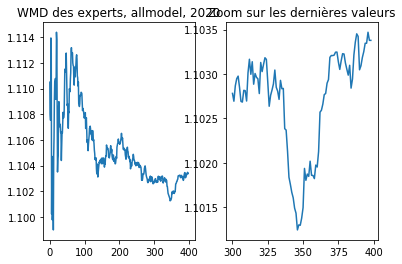

In [122]:
filtre1 = dfc['Groupe'] == 'Novice'
filtre2 = dfc['Annee'] == 2020
filtre3 = dfc['Groupe'] == 'Exp'

df_novice_2020 = dfc.where(filtre1 & filtre2).dropna().copy()
df_exp_2020 = dfc.where(filtre3 & filtre2).dropna().copy()

df_novice_2020_shuffled = df_novice_2020.sample(frac=1) #taille de la base : 871
phrases_novice_2020 = [df_novice_2020_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 * 400)]

WMD_novices_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_novice_2020[i], '_Novice'), 
            add_groupe(phrases_novice_2020[i + 1], '_Novice')) 
    for i in range(0, 800, 2)
                        ]
SI_N_2020 = SansInf(WMD_novices_allmodel)
means_novice_allmodel_2020 = [moyenne(SI_N_2020[:i]) for i in range(1, 400)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_novice_allmodel_2020)
a[0].set_title("WMD des experts, allmodel, 2020")

a[1].plot([i for i in range(300,399)],means_novice_allmodel_2020[300:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

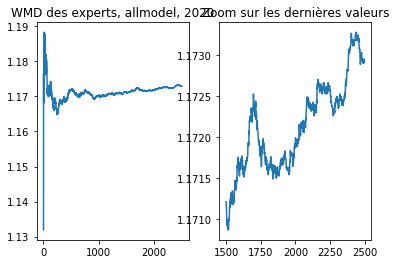

In [125]:
df_exp_2020_shuffled = df_exp_2020.sample(frac=1) #Taille de la base : 5062
phrases_exp_2020 = [df_exp_2020_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 *2500)]

WMD_exp_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_exp_2020[i], '_Exp'), 
            add_groupe(phrases_exp_2020[i + 1], '_Exp')) 
    for i in range(0, 5000, 2)
                        ]

SI_E_2020 = SansInf(WMD_exp_allmodel)
means_exp_allmodel_2020 = [moyenne(SI_E_2020[:i]) for i in range(1, 2500)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_exp_allmodel_2020)
a[0].set_title("WMD des experts, allmodel, 2020")

a[1].plot([i for i in range(1500,2499)],means_exp_allmodel_2020[1500:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

### 2019

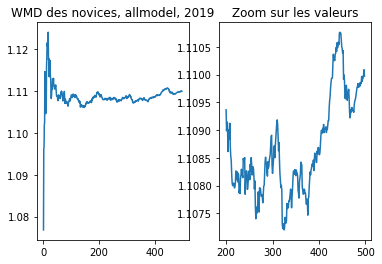

In [102]:
filtre1 = dfc['Groupe'] == 'Novice'
filtre2 = dfc['Annee'] == 2019
filtre3 = dfc['Groupe'] == 'Exp'

df_novice_2019 = dfc.where(filtre1 & filtre2).dropna().copy()
df_exp_2019 = dfc.where(filtre3 & filtre2).dropna().copy()

df_novice_2019_shuffled = df_novice_2019.sample(frac=1) #taille de la base : 1152
phrases_novice_2019 = [df_novice_2019_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 * 500)]

WMD_novices_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_novice_2019[i], '_Novice'), 
            add_groupe(phrases_novice_2019[i + 1], '_Novice')) 
    for i in range(0, 1000, 2)
                        ]

SI_N_2019 = SansInf(WMD_novices_allmodel)
means_novice_allmodel_2019 = [moyenne(SI_N_2019[:i]) for i in range(1, 500)]


fig,a =  plt.subplots(1,2)

a[0].plot(means_novice_allmodel_2019)
a[0].set_title("WMD des novices, allmodel, 2019")

a[1].plot([i for i in range(200,499)],means_novice_allmodel_2019[200:])
a[1].set_title("Zoom sur les valeurs")
plt.show()

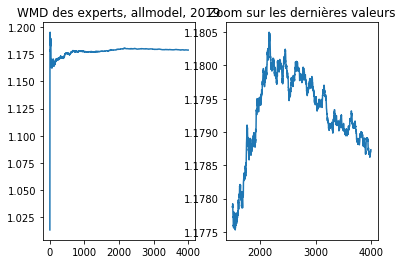

In [103]:
df_exp_2019_shuffled = df_exp_2019.sample(frac=1) #Taille de la base : 8000
phrases_exp_2019 = [df_exp_2019_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 *4000)]

WMD_exp_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_exp_2019[i], '_Exp'), 
            add_groupe(phrases_exp_2019[i + 1], '_Exp')) 
    for i in range(0, 8000, 2)
                        ]

SI_E_2019 = SansInf(WMD_exp_allmodel)
means_exp_allmodel_2019 = [moyenne(SI_E_2019[:i]) for i in range(1, 4000)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_exp_allmodel_2019)
a[0].set_title("WMD des experts, allmodel, 2019")

a[1].plot([i for i in range(1500,3999)],means_exp_allmodel_2019[1500:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

### 2018

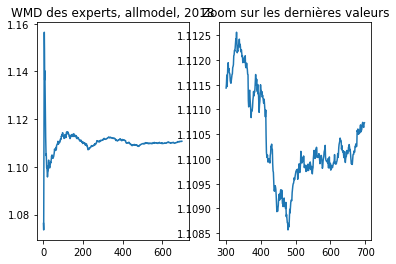

In [128]:
filtre1 = dfc['Groupe'] == 'Novice'
filtre2 = dfc['Annee'] == 2018
filtre3 = dfc['Groupe'] == 'Exp'

df_novice_2018 = dfc.where(filtre1 & filtre2).dropna().copy()
df_exp_2018 = dfc.where(filtre3 & filtre2).dropna().copy()

df_novice_2018_shuffled = df_novice_2018.sample(frac=1) #taille de la base : 1500
phrases_novice_2018 = [df_novice_2018_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 * 700)]

WMD_novices_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_novice_2018[i], '_Novice'), 
            add_groupe(phrases_novice_2018[i + 1], '_Novice')) 
    for i in range(0, 1400, 2)
                        ]
SI_N_2018 = SansInf(WMD_novices_allmodel)
means_novice_allmodel_2018 = [moyenne(SI_N_2018[:i]) for i in range(1, 700)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_novice_allmodel_2018)
a[0].set_title("WMD des experts, allmodel, 2018")

a[1].plot([i for i in range(300,699)],means_novice_allmodel_2018[300:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

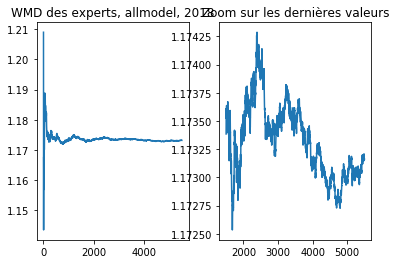

In [104]:
df_exp_2018_shuffled = df_exp_2018.sample(frac=1) #Taille de la base : 11583
phrases_exp_2018 = [df_exp_2018_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 *5500)]

WMD_exp_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_exp_2018[i], '_Exp'), 
            add_groupe(phrases_exp_2018[i + 1], '_Exp')) 
    for i in range(0, 11000, 2)
                        ]

SI_E_2019 = SansInf(WMD_exp_allmodel)
means_exp_allmodel_2018 = [moyenne(SI_E_2019[:i]) for i in range(1, 5500)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_exp_allmodel_2018)
a[0].set_title("WMD des experts, allmodel, 2018")

a[1].plot([i for i in range(1500,5499)],means_exp_allmodel_2018[1500:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

### 2017

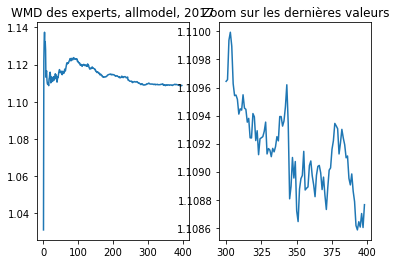

In [110]:
filtre1 = dfc['Groupe'] == 'Novice'
filtre2 = dfc['Annee'] == 2017
filtre3 = dfc['Groupe'] == 'Exp'

df_novice_2017 = dfc.where(filtre1 & filtre2).dropna().copy()
df_exp_2017 = dfc.where(filtre3 & filtre2).dropna().copy()

df_novice_2017_shuffled = df_novice_2017.sample(frac=1) #taille de la base : 825
phrases_novice_2017 = [df_novice_2017_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 * 400)]

WMD_novices_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_novice_2017[i], '_Novice'), 
            add_groupe(phrases_novice_2017[i + 1], '_Novice')) 
    for i in range(0, 800, 2)
                        ]
SI_N_2017 = SansInf(WMD_novices_allmodel)
means_novice_allmodel_2017 = [moyenne(SI_N_2018[:i]) for i in range(1, 400)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_novice_allmodel_2017)
a[0].set_title("WMD des experts, allmodel, 2017")

a[1].plot([i for i in range(300,399)],means_novice_allmodel_2017[300:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

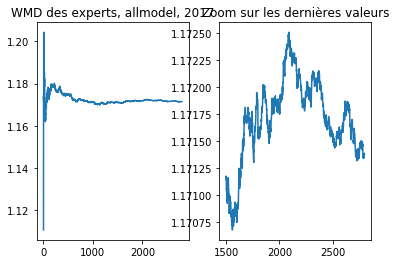

In [115]:
df_exp_2017_shuffled = df_exp_2017.sample(frac=1) #Taille de la base : 5705
phrases_exp_2017 = [df_exp_2017_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 *2800)]

WMD_exp_allmodel = [
    w2v_model_all.wv.wmdistance(
            add_groupe(phrases_exp_2017[i], '_Exp'), 
            add_groupe(phrases_exp_2017[i + 1], '_Exp')) 
    for i in range(0, 5600, 2)
                        ]

SI_E_2017 = SansInf(WMD_exp_allmodel)
means_exp_allmodel_2017 = [moyenne(SI_E_2017[:i]) for i in range(1, 2800)]

fig,a =  plt.subplots(1,2)

a[0].plot(means_exp_allmodel_2017)
a[0].set_title("WMD des experts, allmodel, 2017")

a[1].plot([i for i in range(1500,2799)],means_exp_allmodel_2017[1500:])
a[1].set_title("Zoom sur les dernières valeurs")

plt.show()

In [ ]:
#On va comparer les distances intra de chaque modele selon le temps

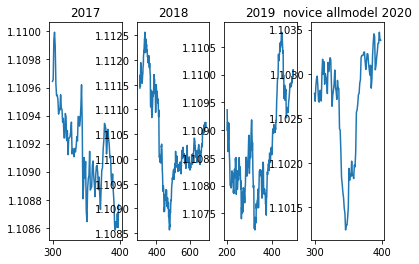

In [129]:
fig, a = plt.subplots(1,4)

a[3].plot([i for i in range(300,399)],means_novice_allmodel_2020[300:])
a[3].set_title("novice allmodel 2020")

a[2].plot([i for i in range(200,499)],means_novice_allmodel_2019[200:])
a[2].set_title("2019")

a[1].plot([i for i in range(1500,5499)],means_exp_allmodel_2018[1500:])
a[1].set_title("2018")

a[0].plot([i for i in range(300,399)],means_novice_allmodel_2017[300:])
a[0].set_title("2017")

plt.show()

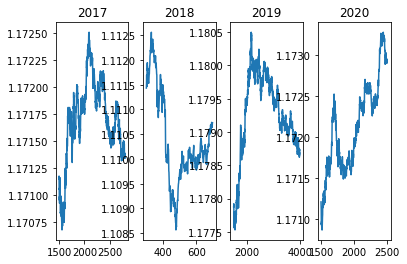

In [130]:
fig, a = plt.subplots(1,4)

a[3].plot([i for i in range(1500,2499)],means_exp_allmodel_2020[1500:])
a[3].set_title("2020")

a[2].plot([i for i in range(1500,3999)],means_exp_allmodel_2019[1500:])
a[2].set_title("2019")

a[1].plot([i for i in range(300,699)],means_novice_allmodel_2018[300:])
a[1].set_title("2018")

a[0].plot([i for i in range(1500,2799)],means_exp_allmodel_2017[1500:])
a[0].set_title("2017")

plt.show()